# Machine Learning - TD1

By **CHARRIER Timothée** and **RAVELET Thomas**

## 1. First steps

In [41]:
# Warning deprecation

import warnings
warnings.filterwarnings("ignore")

# Importation des librairies

import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Importing the dataset
from keras.datasets import mnist

# Loading the dataset

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

### 1.1. What are the shape of the data? 

In [42]:
# Display the dataset shape

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)


Thus, we have 70000 images of 28x28 pixels, which is 784 pixels in total. There are 60000 images for the training set and 10000 images for the test set. Here are 10 random images of the training set :

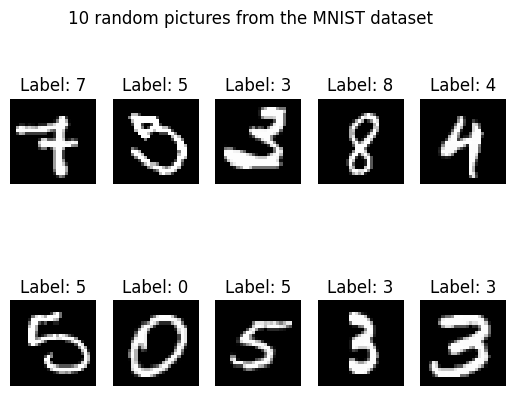

In [43]:
# Display 10 random pictures

fig, ax = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        nb_samples = random.randint(0, len(X_train))
        ax[i, j].imshow(X_train[nb_samples], cmap='gray')
        ax[i, j].set_title("Label: {}".format(Y_train[nb_samples]))
        ax[i, j].axis('off')
        
plt.suptitle("10 random pictures from the MNIST dataset")
plt.show()

### 1.2. Why split the data into training and test sets is important?

The method train_test_split allows to separate the data into two parts: a training part and a test part. This allows to test the model on data that it has not seen during training. This allows to check that the model is not over-trained. Indeed, if the model is over-trained, it will be able to predict the training data but not the test data. This means that the model is not generalizable.

### 1.3. Are the training and test sets balanced?

To check if the training and test sets are balanced, we can plot the number of images for each digit in percentage. We can see that the training and test sets are balanced.

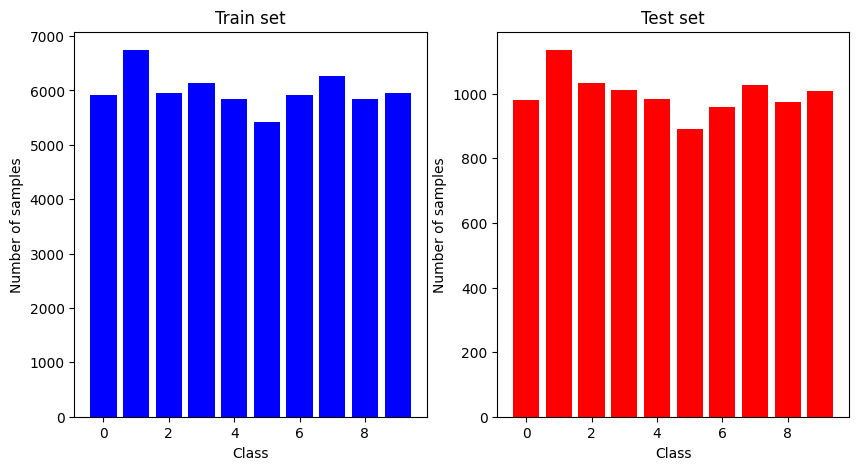

Train set standard deviation: 78.57
Test set standard deviation: 79.17


In [44]:
# Data balancing 

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(np.arange(10), np.bincount(Y_train), color='blue')
ax[0].set_title("Train set")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Number of samples")
ax[1].bar(np.arange(10), np.bincount(Y_test), color='red')
ax[1].set_title("Test set")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Number of samples")
plt.show()

# Ecarts types

print("Train set standard deviation: {:.2f}".format(np.std(X_train)))
print("Test set standard deviation: {:.2f}".format(np.std(X_test)))

We can see that the training and test sets are balanced.

## 2. Second part: non-supervised learning

### 2.1. Perform a PCA on the training set

In this question, we will perform a PCA on the training set with the value of n_components in the following list: [10, 50, 100, 200, 500, 784]. We will then plot a random image of the training set and the corresponding image after the PCA.

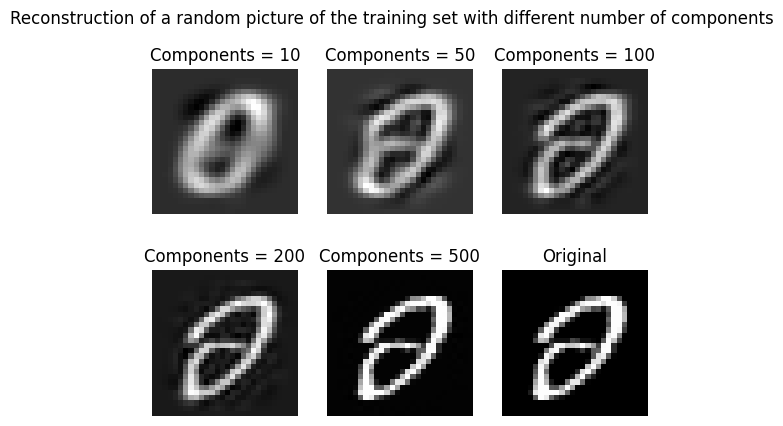

In [55]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# PCA

n_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 200, 500, 784]
random_index = np.random.randint(0, X_train.shape[0])
List_explained_variance = []
count = 0

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(X_train_flat)

    # Explained variance

    List_explained_variance.append(np.sum(pca.explained_variance_ratio_))

    # Reconstruct the data and reshape it with the PCA model and display a picture if n = 10, 50, 100, 200, 500, 784
    if(n == 10 or n == 50 or n == 100 or n == 200 or n == 500 or n == 784):
        X_train_reconstructed = pca.inverse_transform(
            pca.transform(X_train_flat))

        X_train_reconstructed = X_train_reconstructed.reshape(
            X_train.shape[0], 28, 28)

        #  Display the reconstructed picture in the same figure

        plt.subplot(2, 3, count+1)
        plt.imshow(X_train_reconstructed[random_index], cmap='gray')
        plt.axis('off')
        count += 1

        if(n == 784):
            plt.title("Original")

        else:
            plt.title("Components = " + str(n))


plt.suptitle(
    "Reconstruction of a random picture of the training set with different number of components")
plt.show()


### 2.2. Explain these values according to your understanding of PCA and use these values to fit a relevant value for n_components.

We can see that the more components we keep, the more the image is similar to the original image. However, we can see that the image is not very clear when we keep only 10 components. We can also see that the image is very clear when we keep 784 components. Thus, we can say that the best value for n_components is 784. But the higher the value of n_components, the longer the computation time. Thus, we can choose a value of n_components between 200 and 500 to have a good image and a short computation time.

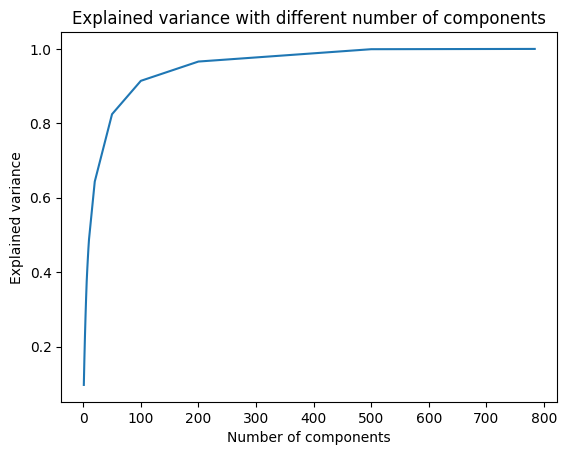

In [56]:
# Plot the explained variance

plt.plot(n_components, List_explained_variance)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.title("Explained variance with different number of components")
plt.show()

When plotting the cumulative explained variance ratio, we can see that the first 200 components explain 90% of the variance. Thus, we can choose a value of n_components between 200 and 500 to have a good image and a short computation time.

### 2.3. With sklearn, perform K-MEANS. Play with the parameter K as well as the initialization (KMEANS++, random, or fixed array).

In [66]:
# Perform Kmeans clustering

from sklearn.cluster import KMeans

# Kmeans clustering with 10 clusters and using kmeans++ initialization vs random initialization

kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_kmeans = kmeans.fit_predict(X_train_flat)

kmeans_random = KMeans(n_clusters=10, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_kmeans_random = kmeans_random.fit_predict(X_train_flat)

<Figure size 1000x500 with 0 Axes>

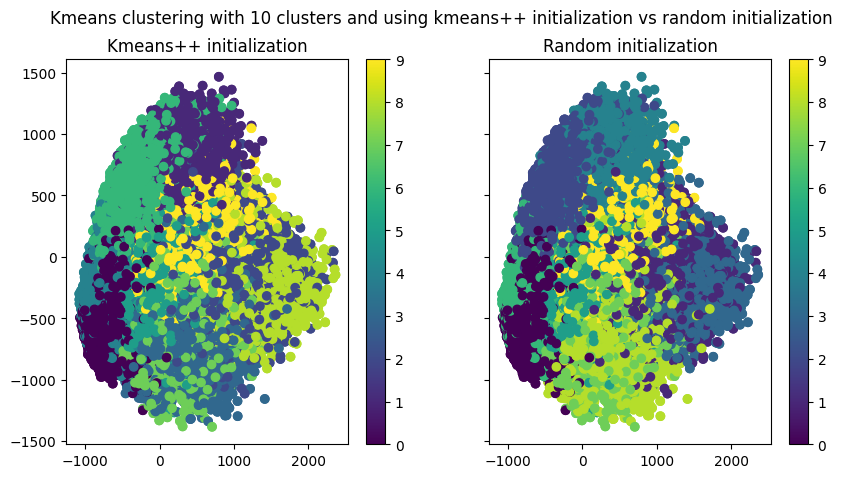

In [67]:
# PCA with 2 components

pca = PCA(n_components=2).fit(X_train_flat)

# Plot the clusters

f = plt.figure(figsize=(10, 5))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

ax1.scatter(pca.transform(X_train_flat)[:, 0], pca.transform(X_train_flat)[:, 1], c=y_kmeans)
ax1.set_title("Kmeans++ initialization")
ax2.scatter(pca.transform(X_train_flat)[:, 0], pca.transform(X_train_flat)[:, 1], c=y_kmeans_random)
ax2.set_title("Random initialization")
f.colorbar(ax1.scatter(pca.transform(X_train_flat)[:, 0], pca.transform(X_train_flat)[:, 1], c=y_kmeans))
f.colorbar(ax2.scatter(pca.transform(X_train_flat)[:, 0], pca.transform(X_train_flat)[:, 1], c=y_kmeans_random))

plt.suptitle("Kmeans clustering with 10 clusters and using kmeans++ initialization vs random initialization")
plt.show()

From the two pictures above, we cannot see any difference between the different initializations.

### 2.4. For the correct K (K=10), evaluate how good is this partition (with the knowledge of y).

Let's evaluate how good is the partition with the knowledge of y. We can easily see that the partition is not good. 

In [68]:
# Evaluate how good the partition is

from sklearn.metrics import adjusted_rand_score

print("Adjusted Rand score with kmeans++ initialization: {:.2f}%".format(adjusted_rand_score(Y_train, y_kmeans)*100))
print("Adjusted Rand score with random initialization: {:.2f}%".format(adjusted_rand_score(Y_train, y_kmeans_random)*100))

Adjusted Rand score with kmeans++ initialization: 36.07%
Adjusted Rand score with random initialization: 36.08%


The result confirms that the partition is not good.

### 2.5. Do the same job with the EM-clustering.

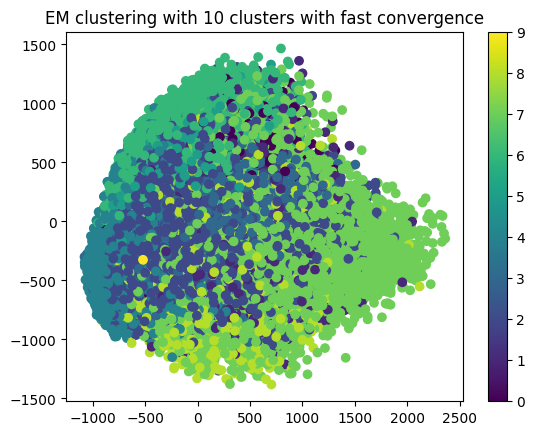

Adjusted Rand score: 18.76%


In [69]:
# Let's do the same but using EM clustering

from sklearn.mixture import GaussianMixture

# EM clustering with 10 clusters with fast convergence

gmm = GaussianMixture(n_components=10, covariance_type='full', max_iter=100, random_state=0)
y_gmm = gmm.fit_predict(X_train_flat)

# Plot the clusters

plt.scatter(pca.transform(X_train_flat)[:, 0], pca.transform(X_train_flat)[:, 1], c=y_gmm)
plt.colorbar()
plt.title("EM clustering with 10 clusters with fast convergence")
plt.show()

# Evaluate how good the partition is

print("Adjusted Rand score: {:.2f}%".format(adjusted_rand_score(Y_train, y_gmm)*100))